## Kaggle – DataTops®
Luismi ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a Luismi a mejorar ese modelo?

## Métrica: 
Error de raíz cuadrada media (RMSE) es la desviación estándar de los valores residuales (errores de predicción). Los valores residuales son una medida de la distancia de los puntos de datos de la línea de regresión; RMSE es una medida de cuál es el nivel de dispersión de estos valores residuales. En otras palabras, le indica el nivel de concentración de los datos en la línea de mejor ajuste.


$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$


## Librerías

In [29]:
import numpy as np
import pandas as pd
import toolbox_ML as tb
import bootcampviztools as bt

from PIL import Image
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRFRegressor
from catboost import CatBoostRegressor
import urllib.request

## Datos

In [30]:
# Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("./data/train.csv", index_col = 0)
df.index.name = None

In [31]:
train_bck_up = df.copy()

## Exploración de los datos

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
dtypes: float64(2), object(10)
memory usage: 92.6+ KB


In [33]:
df.isna().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_in_euros      0
dtype: int64

In [34]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00


In [35]:
df.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00
1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00
78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00
23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00
229,Dell,Alienware 17,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42kg,2456.34


In [36]:
tb.describe_df(df)

,DATA_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
Company,object,0,19,2.08
Product,object,0,480,52.63
TypeName,object,0,6,0.66
Inches,float64,0,17,1.86
ScreenResolution,object,0,36,3.95
Cpu,object,0,107,11.73
Ram,object,0,9,0.99
Memory,object,0,37,4.06
Gpu,object,0,93,10.2
OpSys,object,0,9,0.99


In [37]:
tb.tipifica_variables(df)

,variable,tipo
0,Company,Numérica Discreta
1,Product,Numérica Continua
2,TypeName,Categórica
3,Inches,Numérica Discreta
4,ScreenResolution,Numérica Discreta
5,Cpu,Numérica Discreta
6,Ram,Categórica
7,Memory,Numérica Discreta
8,Gpu,Numérica Discreta
9,OpSys,Categórica


## Procesado de datos

In [38]:
target = "Price_in_euros"

In [39]:
df.drop_duplicates(keep = "first", inplace = True)

In [40]:
df["inches"] = df.Inches.astype(float)
df['ram_gb'] = df['Ram'].str.replace('GB', '').astype(int)
df["weight_kg"] = df['Weight'].str.replace('kg', '').astype(float)
df.drop(columns = ["Inches", "Ram", "Weight"], inplace = True)

In [41]:
# Ordenamos las features categóricas de menor precio de median a mayor precio para poder convertirlas en numéricas:
# categories_company = df.groupby(df["Company"])["Price_in_euros"].median().sort_values().index.to_list()
# categories_typename = df.groupby(df["TypeName"])["Price_in_euros"].median().sort_values().index.to_list()
# categories_resolution = df.groupby(df["ScreenResolution"])["Price_in_euros"].median().sort_values().index.to_list()
# categories_cpu = df.groupby(df["Cpu"])["Price_in_euros"].median().sort_values().index.to_list()
# categories_memory = df.groupby(df["Memory"])["Price_in_euros"].median().sort_values().index.to_list()
# categories_gpu = df.groupby(df["Gpu"])["Price_in_euros"].median().sort_values().index.to_list()

# total_cat = [categories_company, categories_resolution, categories_cpu, categories_memory, categories_gpu]
# cols = ["Company", "ScreenResolution", "Cpu", "Memory", "Gpu"]

# enc = OrdinalEncoder(categories = total_cat, dtype= int, handle_unknown = "use_encoded_value", unknown_value = -1)
# df[cols] = enc.fit_transform(df[cols])
# df.head()

In [42]:
tb.get_features_cat_regression(df, "Price_in_euros")

['Company',
 'Product',
 'TypeName',
 'ScreenResolution',
 'Cpu',
 'Memory',
 'Gpu',
 'OpSys']

In [43]:
tb.get_features_num_regression(df, "Price_in_euros", 0.6)

[]

In [44]:
feature_sel = ["ram_gb", "encoded_opsys", "encoded_type", "encoded_company"]

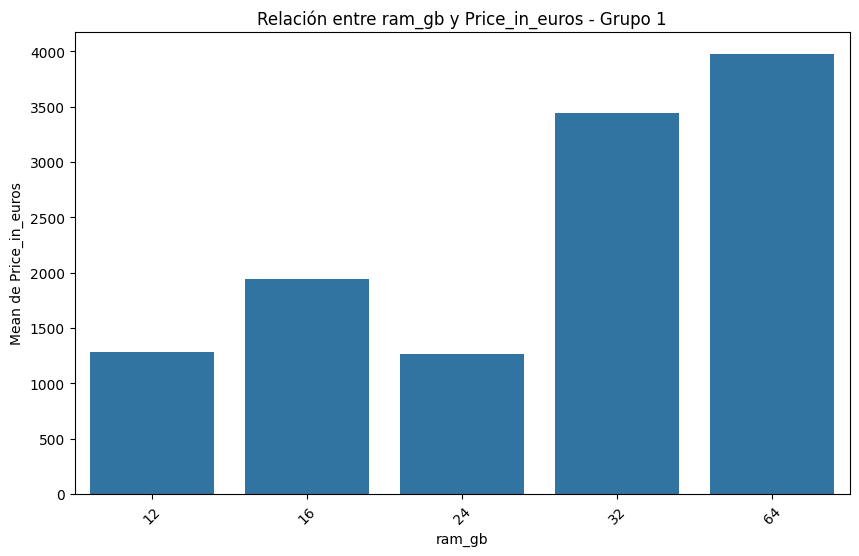

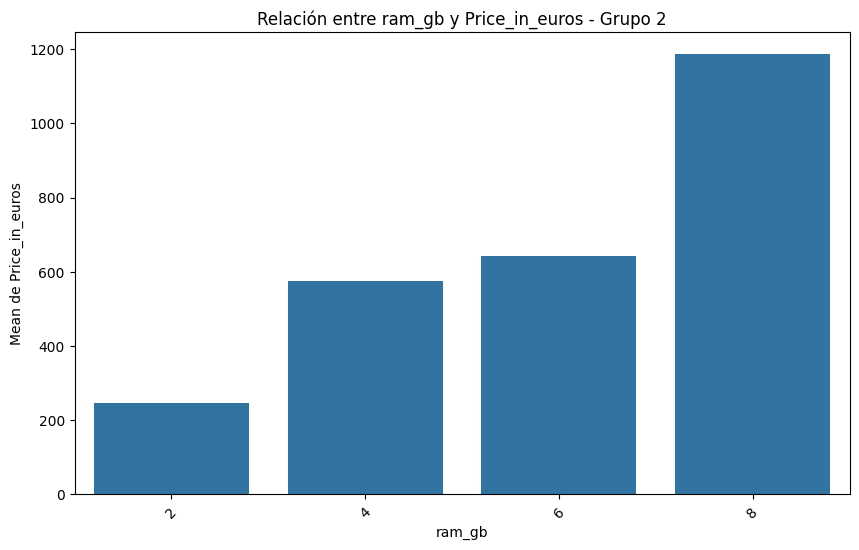

In [45]:
bt.plot_categorical_numerical_relationship(df, categorical_col = "ram_gb", numerical_col = target)

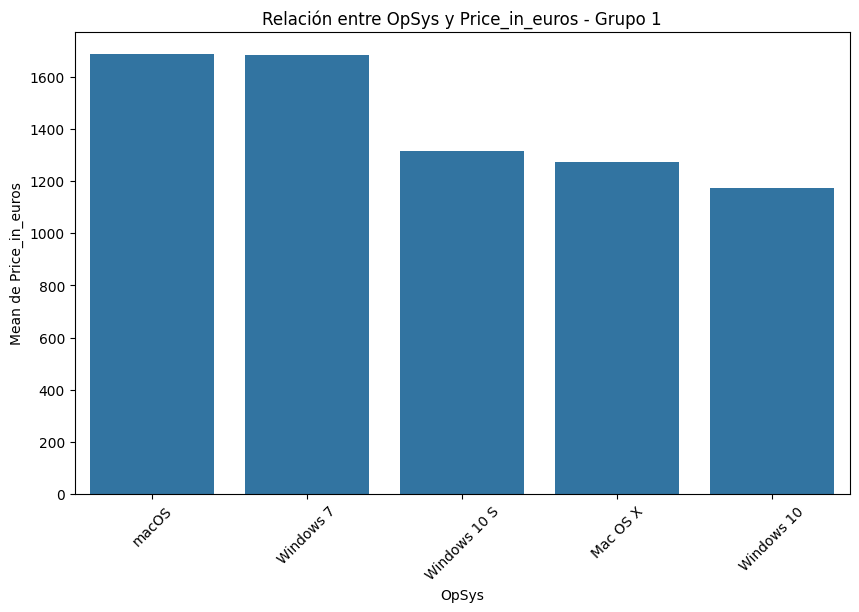

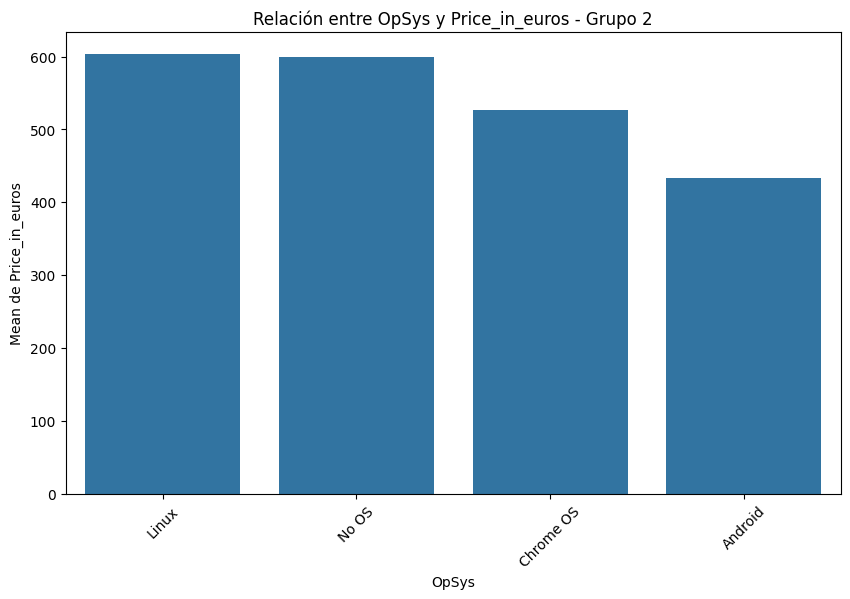

In [46]:
bt.plot_categorical_numerical_relationship(df, categorical_col = "OpSys", numerical_col = target)

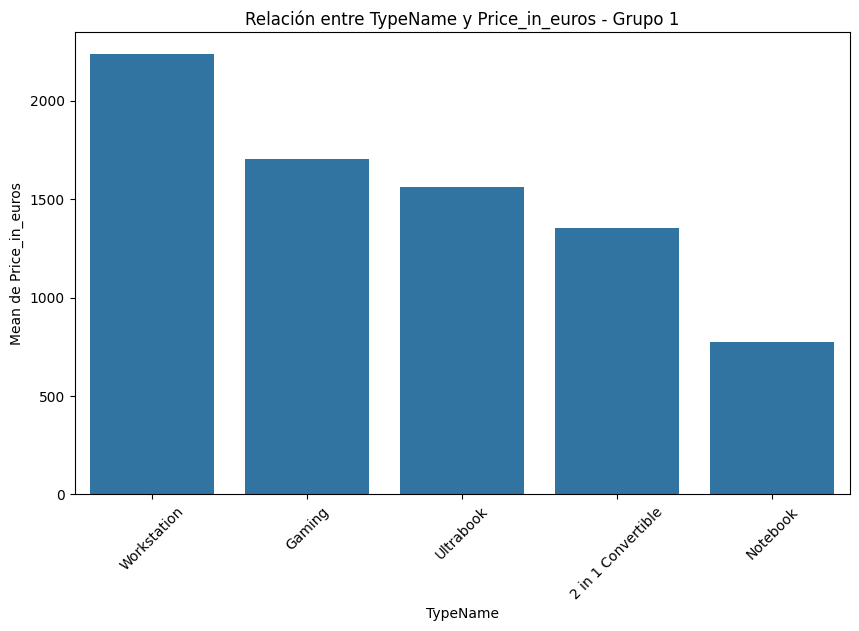

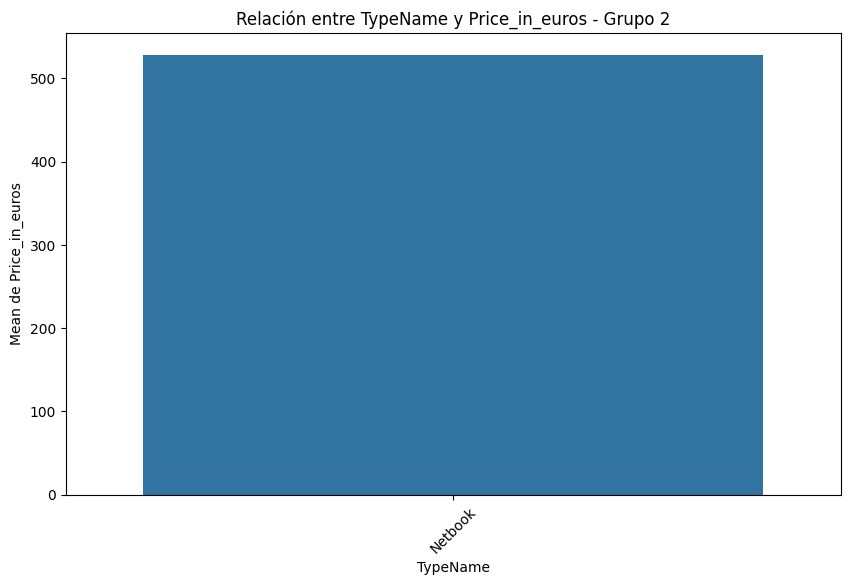

In [47]:
bt.plot_categorical_numerical_relationship(df, categorical_col= "TypeName", numerical_col= target)

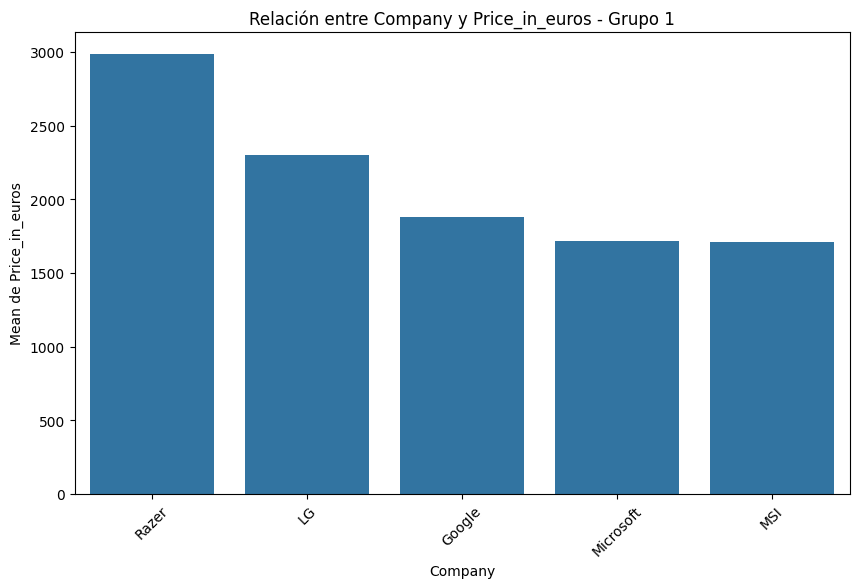

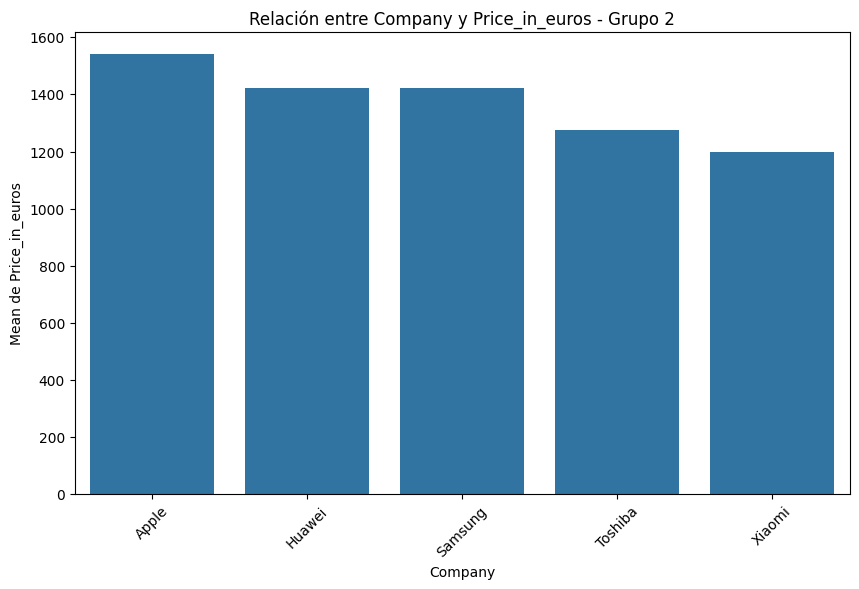

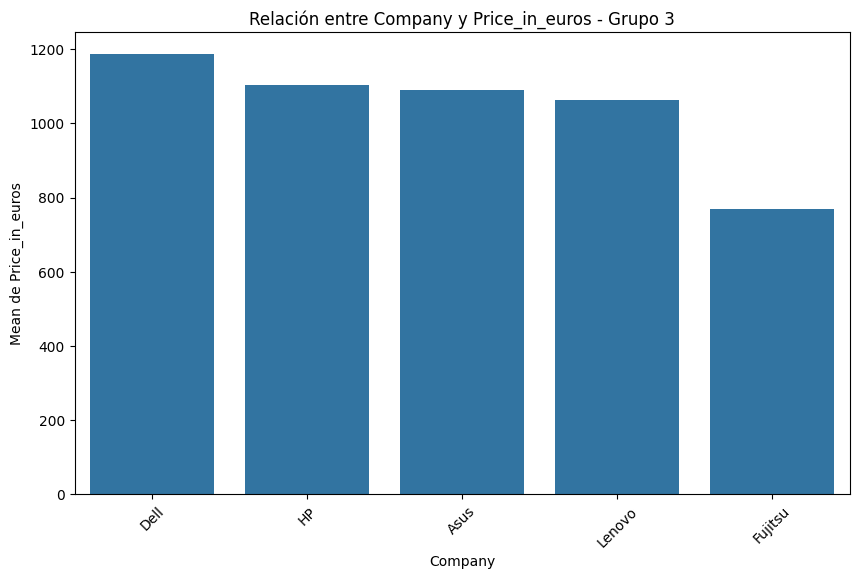

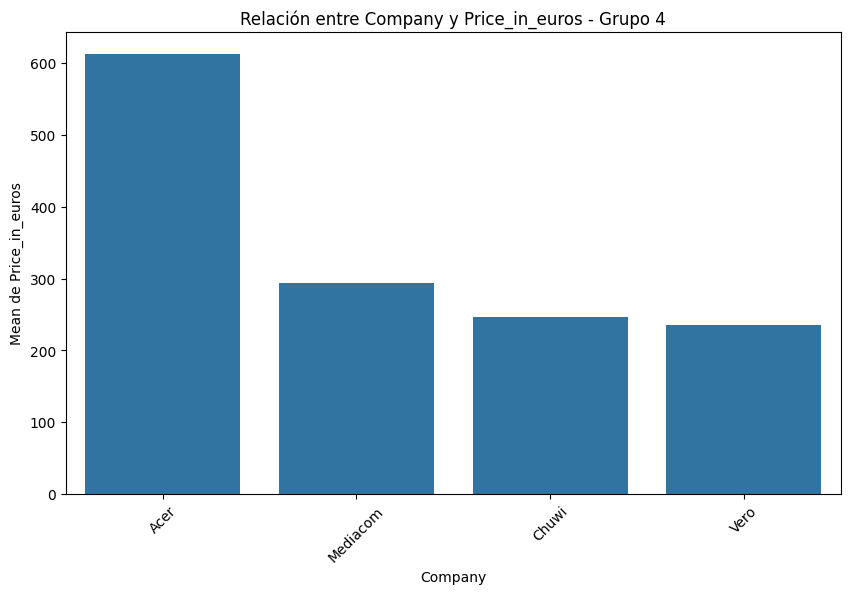

In [48]:
bt.plot_categorical_numerical_relationship(df, categorical_col = "Company", numerical_col = target)

In [49]:
categories_company = df.groupby(df["Company"])["Price_in_euros"].median().sort_values().index.to_list()
categories_typename = df.groupby(df["TypeName"])["Price_in_euros"].median().sort_values().index.to_list()
categories_opsys = df.groupby(df["OpSys"])["Price_in_euros"].median().sort_values().index.to_list()

total_cat = [categories_typename, categories_opsys, categories_company]
cols = ["TypeName", "OpSys", "Company"]

enc = OrdinalEncoder(categories = total_cat, dtype= int, handle_unknown = "use_encoded_value", unknown_value = -1)
df[cols] = enc.fit_transform(df[cols])

In [50]:
# # Codificamos el tipo de ordenador siguiendo su orden de precio medio:
# categories_typename = ["Netbook", "Notebook", "2 in 1 Convertible", "Ultrabook", "Gaming", "Workstation"]

# enc = OrdinalEncoder(categories = [categories_typename], dtype= int, handle_unknown = "use_encoded_value", unknown_value = -1)
# df["encoded_type"] = enc.fit_transform(df[["TypeName"]])

In [51]:
# # Codificamos el sistema operativo siguiendo su orden de precio medio:
# categories_opsys = ["macOS", "Windows 7", "Windows 10 S", "Mac OS X", "Windows 10", "Linux", "No OS", "Chrome OS", "Android" ]

# enc = OrdinalEncoder(categories = [categories_opsys], dtype= int, handle_unknown = "use_encoded_value", unknown_value = -1)
# df["encoded_opsys"] = enc.fit_transform(df[["OpSys"]])

In [52]:
# # Codificamos las compañías siguiendo su orden de precio medio:
# categories_company = df.groupby(df["Company"])["Price_in_euros"].median().sort_values().index.to_list()

# enc = OrdinalEncoder(categories = [categories_company], dtype= int, handle_unknown = "use_encoded_value", unknown_value = -1)
# df["encoded_company"] = enc.fit_transform(df[["Company"]])

In [53]:
dummies_cols = ["ScreenResolution", "Cpu", "Memory", "Gpu"]

In [54]:
df = pd.get_dummies(df, columns = dummies_cols, dtype = int)

In [55]:
# # Probar target encoding:
# df["columna_categorica_encoded"] = df.groupby("columna_categorica")[target].transform("mean")

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 755 to 229
Columns: 281 entries, Company to Gpu_Nvidia Quadro M620M
dtypes: float64(3), int32(277), object(1)
memory usage: 998.9+ KB


In [57]:
feat_sel = list(df.columns)
col_drop = ["Product", "inches", "weight_kg"]

for col in feat_sel:
    if col in col_drop:
        feat_sel.remove(col)

feat_sel

['Company',
 'TypeName',
 'OpSys',
 'Price_in_euros',
 'ram_gb',
 'ScreenResolution_1366x768',
 'ScreenResolution_1440x900',
 'ScreenResolution_1600x900',
 'ScreenResolution_1920x1080',
 'ScreenResolution_2560x1440',
 'ScreenResolution_4K Ultra HD / Touchscreen 3840x2160',
 'ScreenResolution_4K Ultra HD 3840x2160',
 'ScreenResolution_Full HD / Touchscreen 1920x1080',
 'ScreenResolution_Full HD 1920x1080',
 'ScreenResolution_IPS Panel 1366x768',
 'ScreenResolution_IPS Panel 2560x1440',
 'ScreenResolution_IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
 'ScreenResolution_IPS Panel 4K Ultra HD 3840x2160',
 'ScreenResolution_IPS Panel Full HD / Touchscreen 1920x1080',
 'ScreenResolution_IPS Panel Full HD 1920x1080',
 'ScreenResolution_IPS Panel Full HD 1920x1200',
 'ScreenResolution_IPS Panel Full HD 2160x1440',
 'ScreenResolution_IPS Panel Full HD 2560x1440',
 'ScreenResolution_IPS Panel Quad HD+ / Touchscreen 3200x1800',
 'ScreenResolution_IPS Panel Quad HD+ 2560x1440',
 'ScreenResolutio

Nuestro target es la columna `Price_in_euros`

-----------------------------------------------------------------------------------------------------------------

## Modelado

### 1. Definir X e y

In [58]:
X = df[feat_sel].drop(columns = [target])
y = df[target]

### 2. Dividir X_train, X_test, y_train, y_test

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [60]:
X_train.head()

,Company,TypeName,OpSys,ram_gb,ScreenResolution_1366x768,ScreenResolution_1440x900,ScreenResolution_1600x900,ScreenResolution_1920x1080,ScreenResolution_2560x1440,ScreenResolution_4K Ultra HD / Touchscreen 3840x2160,...,Gpu_Nvidia GeForce MX130,Gpu_Nvidia GeForce MX150,Gpu_Nvidia Quadro M1000M,Gpu_Nvidia Quadro M1200,Gpu_Nvidia Quadro M2000M,Gpu_Nvidia Quadro M2200M,Gpu_Nvidia Quadro M3000M,Gpu_Nvidia Quadro M500M,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M
112,5,1,4,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,11,4,8,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1190,6,1,4,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55,3,1,4,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1043,7,1,4,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
y_train.head()

112     1480.00
13      2439.97
1190     369.00
55       384.00
1043    1080.00
Name: Price_in_euros, dtype: float64

In [62]:
X_train.columns = X_train.columns.str.replace(r'[\[\]<>]', '', regex=True)
X_train.columns = X_train.columns.astype(str)

X_test.columns = X_test.columns.str.replace(r'[\[\]<>]', '', regex=True)
X_test.columns = X_test.columns.astype(str)

### 3. Baseline de modelos


In [63]:
model_names = ["Random Forest", "XGBoost", "LightGBM"]
rf_reg = RandomForestRegressor(random_state = 42)
xg_reg = XGBRFRegressor(random_state = 42)
lgb_reg = LGBMRegressor(random_state = 42, verbose = -100, n_jobs = -1)
models = [rf_reg, xg_reg, lgb_reg]

resultados = []

for model_name, modelo in zip(model_names, models):
    metrica = np.mean(cross_val_score(modelo, X_train, y_train, cv = 5, scoring  = "neg_root_mean_squared_error"))
    data = {
        "model": model_name,
        "RSME": metrica
    }
    print(data)
    resultados.append(data.copy())
df_resultados = pd.DataFrame(resultados)
df_resultados.sort_values("RSME", ascending = False)

{'model': 'Random Forest', 'RSME': -317.594531373032}
{'model': 'XGBoost', 'RSME': -336.1754998798}
{'model': 'LightGBM', 'RSME': -383.92352879557404}


,model,RSME
0,Random Forest,-317.594531
1,XGBoost,-336.175500
2,LightGBM,-383.923529


In [64]:
# cat_reg = CatBoostRegressor(n_estimators = 100, depth = 5, learning_rate = 0.5, verbose = 100)

# cat_reg.fit(X_train, y_train)

In [65]:
# rfmodel = RandomForestRegressor(max_depth = 10)

# rfmodel.fit(X_train, y_train)

In [66]:
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)

In [67]:
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)

In [68]:
lgb_reg.fit(X_train, y_train)
y_pred = lgb_reg.predict(X_test)

In [69]:
# y_pred = rfmodel.predict(X_test)

### 4. Sacar métricas, valorar los modelos 

Recuerda que en la competición se va a evaluar con la métrica de ``RMSE``.

In [70]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

356.6002379045727


In [71]:
param_grid = {
    'n_estimators': [200, 500, 800, 1000],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 8],
    'bootstrap': [True, False]
}

grid_model = GridSearchCV(rf_reg, param_grid = param_grid, scoring = "neg_root_mean_squared_error", cv = 5, n_jobs= -1)

grid_model.fit(X_train, y_train)

grid_model.best_score_
best_model = grid_model.best_estimator_

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 1. Carga los datos de `test.csv` para predecir.


In [87]:
X_pred = pd.read_csv("data/test.csv", index_col = 0)
X_pred.index.name = None
X_pred.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg
1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg
1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg
1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg
1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg


In [88]:
X_pred.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
820,MSI,GE72MVR 7RG,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.9kg
948,Toshiba,Tecra Z40-C-12X,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.47kg
483,Dell,Precision M5520,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg
1017,HP,Probook 440,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.64kg
421,Asus,ZenBook Flip,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.27kg


In [89]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           391 non-null    object 
 1   Product           391 non-null    object 
 2   TypeName          391 non-null    object 
 3   Inches            391 non-null    float64
 4   ScreenResolution  391 non-null    object 
 5   Cpu               391 non-null    object 
 6   Ram               391 non-null    object 
 7   Memory            391 non-null    object 
 8   Gpu               391 non-null    object 
 9   OpSys             391 non-null    object 
 10  Weight            391 non-null    object 
dtypes: float64(1), object(10)
memory usage: 36.7+ KB


 ## 2. Replicar el procesado para ``test.csv``

In [90]:
X_pred["inches"] = X_pred.Inches.astype(float)
X_pred['ram_gb'] = X_pred['Ram'].str.replace('GB', '').astype(int)
X_pred["weight_kg"] = X_pred['Weight'].str.replace('kg', '').astype(float)
X_pred.drop(columns = ["Inches", "Ram", "Weight"], inplace = True)

In [91]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           391 non-null    object 
 1   Product           391 non-null    object 
 2   TypeName          391 non-null    object 
 3   ScreenResolution  391 non-null    object 
 4   Cpu               391 non-null    object 
 5   Memory            391 non-null    object 
 6   Gpu               391 non-null    object 
 7   OpSys             391 non-null    object 
 8   inches            391 non-null    float64
 9   ram_gb            391 non-null    int32  
 10  weight_kg         391 non-null    float64
dtypes: float64(2), int32(1), object(8)
memory usage: 35.1+ KB


In [92]:
# # # Ordenamos las features categóricas de menor precio de median a mayor precio para poder convertirlas en numéricas:
# # categories_company = df.groupby(df["Company"])["Price_in_euros"].median().sort_values().index.to_list()
# # # categories_typename = df.groupby(df["TypeName"])["Price_in_euros"].median().sort_values().index.to_list()
# # categories_resolution = df.groupby(df["ScreenResolution"])["Price_in_euros"].median().sort_values().index.to_list()
# # categories_cpu = df.groupby(df["Cpu"])["Price_in_euros"].median().sort_values().index.to_list()
# # categories_memory = df.groupby(df["Memory"])["Price_in_euros"].median().sort_values().index.to_list()
# # categories_gpu = df.groupby(df["Gpu"])["Price_in_euros"].median().sort_values().index.to_list()

# # total_cat = [categories_company, categories_resolution, categories_cpu, categories_memory, categories_gpu]
# # cols = ["Company", "ScreenResolution", "Cpu", "Memory", "Gpu"]

# # enc = OrdinalEncoder(categories = total_cat, dtype= int)
# # X_pred[cols] = enc.transform(X_pred[cols])

# # Con la ram, el sistema operativo y el typename, vamos a hacer un get_dummies:
# cols_dummies = X_train.columns
# X_pred = pd.get_dummies(X_pred, columns = feat_sel, dtype = int).reindex(columns = cols_dummies, fill_value=0)

In [93]:
X_pred[cols] = enc.transform(X_pred[cols])

X_pred = pd.get_dummies(X_pred, columns = dummies_cols, dtype = int).reindex(columns = dummies_cols, fill_value=0)

X_pred.columns = X_pred.columns.str.replace(r'[\[\]<>]', '', regex=True)
X_pred.columns = X_pred.columns.astype(str)

In [96]:
X_pred[feat_sel]

KeyError: "None of [Index(['Company', 'TypeName', 'OpSys', 'Price_in_euros', 'ram_gb',\n       'ScreenResolution_1366x768', 'ScreenResolution_1440x900',\n       'ScreenResolution_1600x900', 'ScreenResolution_1920x1080',\n       'ScreenResolution_2560x1440',\n       ...\n       'Gpu_Nvidia GeForce MX130', 'Gpu_Nvidia GeForce MX150',\n       'Gpu_Nvidia Quadro M1000M', 'Gpu_Nvidia Quadro M1200',\n       'Gpu_Nvidia Quadro M2000M', 'Gpu_Nvidia Quadro M2200M',\n       'Gpu_Nvidia Quadro M3000M', 'Gpu_Nvidia Quadro M500M',\n       'Gpu_Nvidia Quadro M620', 'Gpu_Nvidia Quadro M620M'],\n      dtype='object', length=278)] are in the [columns]"

In [95]:
predictions_submit = best_model.predict(X_pred[feat_sel])
predictions_submit

KeyError: "None of [Index(['Company', 'TypeName', 'OpSys', 'Price_in_euros', 'ram_gb',\n       'ScreenResolution_1366x768', 'ScreenResolution_1440x900',\n       'ScreenResolution_1600x900', 'ScreenResolution_1920x1080',\n       'ScreenResolution_2560x1440',\n       ...\n       'Gpu_Nvidia GeForce MX130', 'Gpu_Nvidia GeForce MX150',\n       'Gpu_Nvidia Quadro M1000M', 'Gpu_Nvidia Quadro M1200',\n       'Gpu_Nvidia Quadro M2000M', 'Gpu_Nvidia Quadro M2200M',\n       'Gpu_Nvidia Quadro M3000M', 'Gpu_Nvidia Quadro M500M',\n       'Gpu_Nvidia Quadro M620', 'Gpu_Nvidia Quadro M620M'],\n      dtype='object', length=278)] are in the [columns]"

### 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [60]:
sample = pd.read_csv("data/sample_submission.csv")

In [61]:
sample.head()

,laptop_ID,Price_in_euros
0,209,1949.1
1,1281,805.0
2,1168,1101.0
3,1231,1293.8
4,1020,1832.6


In [62]:
sample.shape

(391, 2)

### 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [63]:
#¿Cómo creamos la submission?
submission = pd.DataFrame({"laptop_ID": X_pred.index,
                        "Price_in_euros": predictions_submit})

In [64]:
submission.head()

,laptop_ID,Price_in_euros
0,209,1425.790890
1,1281,359.049990
2,1168,357.942807
3,1231,1079.941803
4,1020,841.743495


In [65]:
submission.shape

(391, 2)

### 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [66]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto del TA: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

In [67]:
chequeador(submission)

You're ready to submit!
